# 가설 3: 구원 투수(일명 불펜 투수)는 다른 포지션에 비해 FA 가격이 낮을 것이다.

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fvQ
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
fc-cache: invalid option -- 'Q'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose            display status information while busy
  -V, --version            display font config version and exit
  -h, --help               d

In [2]:
!gdown https://drive.google.com/uc?id=1wCRTKmeGQLVeagcFRrN5kSe_NB9yKeBH

Downloading...
From: https://drive.google.com/uc?id=1wCRTKmeGQLVeagcFRrN5kSe_NB9yKeBH
To: /content/KBO FA 계약 내역(2013-2024).csv
100% 7.64k/7.64k [00:00<00:00, 19.4MB/s]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm
from scipy import stats

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
fa = pd.read_csv("KBO FA 계약 내역(2013-2024).csv", encoding='cp949')
fa

,Year,FA Year,Team,Pos,Name,Rank,계약 연수,FA 계약 총액,잔류 여부,비고
0,2012,2013,롯데,LF,김주찬,NaN,4,50.00,이적,NaN
1,2012,2013,LG,3B,정성훈,NaN,4,34.00,잔류,NaN
2,2012,2013,LG,RF,이진영,NaN,4,34.00,잔류,NaN
3,2012,2013,롯데,DH,홍성흔,NaN,4,31.00,이적,NaN
4,2012,2013,삼성,RP,정현욱,NaN,4,28.60,이적,NaN
5,2012,2013,SK,1B,이호준,NaN,3,20.00,이적,NaN
6,2012,2013,KIA,LF,김원섭,NaN,3,14.00,잔류,NaN
7,2012,2013,KIA,3B,이현곤,NaN,3,10.50,이적,NaN
8,2012,2013,한화,RP,마일영,NaN,3,8.00,잔류,NaN
9,2012,2013,KIA,CP,유동훈,NaN,2,7.50,잔류,NaN


In [6]:
fa = fa[fa['계약 연수'] != 0]

<ipython-input-7-fa970e10889c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fa['FA 계약 총액'] = pd.to_numeric(fa['FA 계약 총액'], errors='coerce')


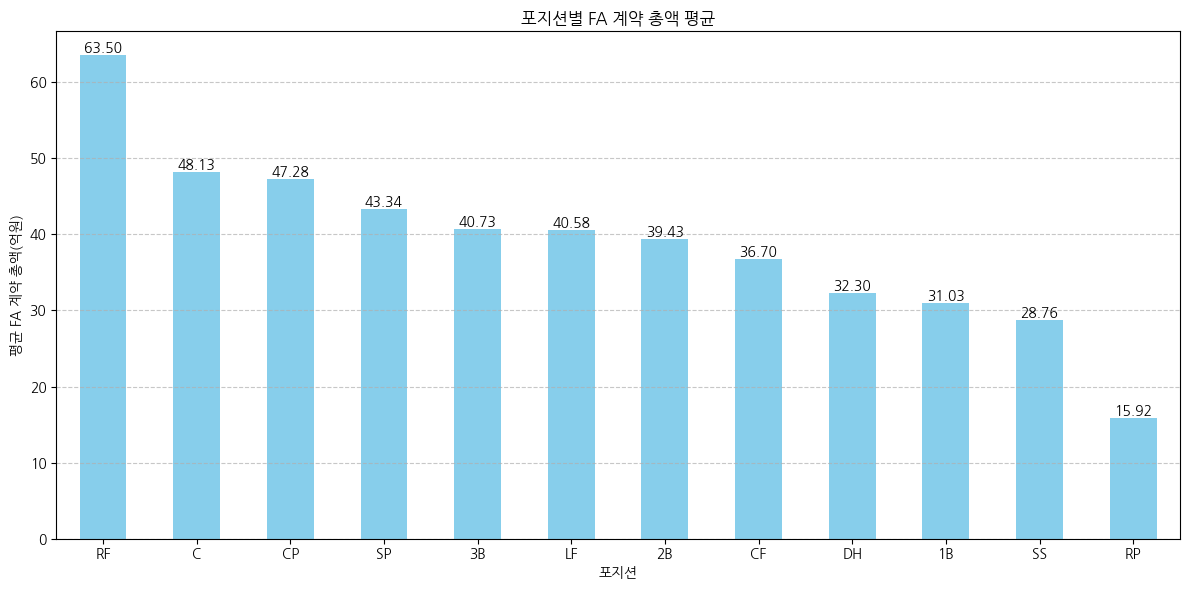

In [7]:
fa['FA 계약 총액'] = pd.to_numeric(fa['FA 계약 총액'], errors='coerce')
pos_avg_contract = fa.groupby('Pos')['FA 계약 총액'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
pos_avg_contract.plot(kind='bar', color='skyblue')
plt.title('포지션별 FA 계약 총액 평균')
plt.xlabel('포지션')
plt.ylabel('평균 FA 계약 총액(억원)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
for i, value in enumerate(pos_avg_contract):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.show()

In [8]:
positions = fa['Pos'].unique()
contract_by_position = [fa[fa['Pos'] == pos]['FA 계약 총액'].dropna() for pos in positions]

# 데이터가 충분한지 확인
valid_positions = []
valid_contract_data = []
for i, pos_data in enumerate(contract_by_position):
    if len(pos_data) >= 5:  # 최소 5개 이상의 데이터가 있는 포지션만 분석
        valid_positions.append(positions[i])
        valid_contract_data.append(pos_data)

# ANOVA 수행
if len(valid_positions) >= 2:
    f_stat, p_value = stats.f_oneway(*valid_contract_data)
    print(f"ANOVA 결과: F-통계량 = {f_stat:.4f}, p-값 = {p_value:.4f}")

    alpha = 0.05
    if p_value < alpha:
        print("귀무가설 기각 : 유의미한 차이 O")
    else:
        print("귀무가설 채택 : 유의미한 차이 X")

ANOVA 결과: F-통계량 = 2.7900, p-값 = 0.0022
귀무가설 기각 : 유의미한 차이 O


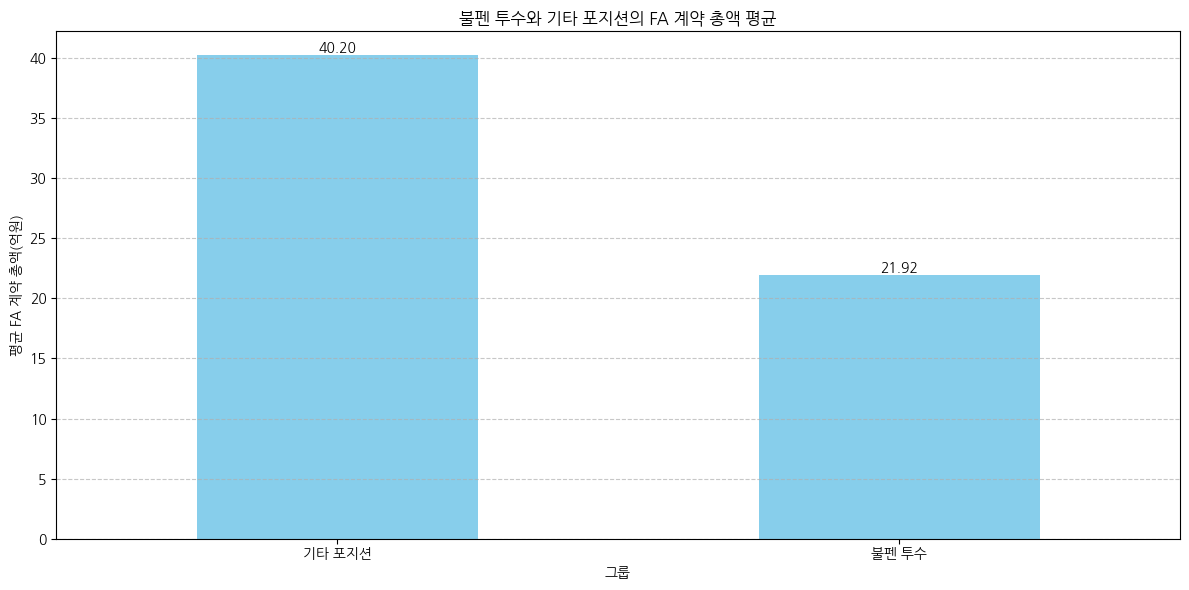

In [9]:
fa_group = fa.copy()
fa_group['group'] = fa_group['Pos'].apply(lambda x: '불펜 투수' if x in ['RP', 'CP'] else '기타 포지션')

pitcher_pos_avg_contract = fa_group.groupby('group')['FA 계약 총액'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
pitcher_pos_avg_contract.plot(kind='bar', color='skyblue')
plt.title('불펜 투수와 기타 포지션의 FA 계약 총액 평균')
plt.xlabel('그룹')
plt.ylabel('평균 FA 계약 총액(억원)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
for i, value in enumerate(pitcher_pos_avg_contract):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.show()

In [10]:
from scipy import stats

rp_cp_fa = fa_group[fa_group['group'] == "불펜 투수"]['FA 계약 총액']
others_fa = fa_group[fa_group['group'] == "기타 포지션"]['FA 계약 총액']

t_stat, p_value = stats.ttest_ind(rp_cp_fa, others_fa, equal_var=False)

print(f'불펜 투수와 기타 포지션의 FA 계약 총액의 t-statistic: {t_stat}')
print(f'불펜 투수와 기타 포지션의 FA 계약 총액의 p-value: {p_value}')

alpha = 0.05
if p_value < value:
  print("귀무가설 기각 : 유의미한 차이 O")
else:
  print("귀무가설 채택 : 유의미한 차이 X")

불펜 투수와 기타 포지션의 FA 계약 총액의 t-statistic: -4.418941289200286
불펜 투수와 기타 포지션의 FA 계약 총액의 p-value: 2.067449190495838e-05
귀무가설 기각 : 유의미한 차이 O
